# **MOUNTAIN CAR**

### **OBJECTIVE**

>1. `Report the training performance of these methods with the following plots: (i) 
cumulative reward per episode obtained by the agent, and (ii) the number of
time-steps required to solve the task per episode of experience.`
2. `For the test performance, after every 10 episodes of training.
run the estimated policy in the environment for 5 test episodes and report the
mean over (i) cumulative reward per episode obtained by the agent, and (ii)
the number of time-steps required to solve the task per episode of experience`
3. `In both training and testing plots, highlight the optimal performance (maximum return 
in an episode/minimum number of time-steps per episode) in a dotted line.`
4. `Please provide your own observations with respect to the results obtained,
specifically in terms of speed of convergence to the right optimal solutions.`
5. `If applicable please do an in-depth hyper-parameter search. Report the justification of 
your choices for each hyper-parameters with supporting plots.`

### **PROBLEM DEFINITION**

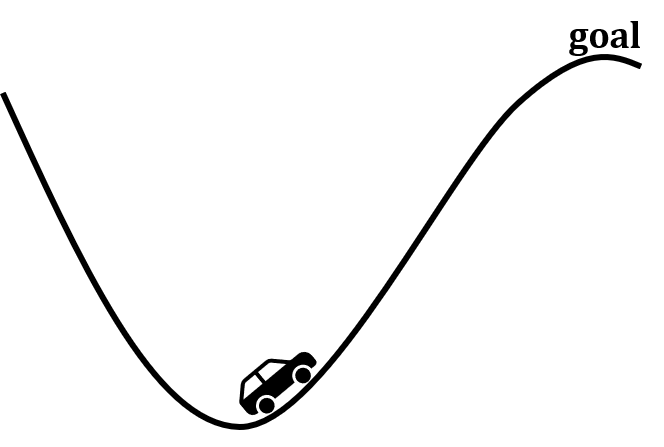

>`The Mountain Car environment. The goal of the agent is to driver past the top of the rightmost mountain. Each step results in a reward of − 1, except when the agent reaches the top of the rightmost mountain (GOAL)(the position range is sp ∈ [0,0.1]). The reward function at point (GOAL)is 50 and at MIDDLE is 10. The agent start from a random state, and the training will end once it reaches GOAL`

>`problem: you cannot go straight, because the motor is too weak. Instead, you first need to go left and then right (possibly multiple times) to gain enough momentum.`

>* **The state** at any time step can be fully described by the car's position and speed.
* **The actions** available to the agent are "accelerate left", "accelerate right" or "do nothing"
* **The reward** is -1 at any time step except the final time step (when the car reaches the goal). This setting makes sure that the agent tries to find the fastest way to the goal

## **IMPLMENTATION BY Q_LEARNING**

### **INSTALL LIBRARIES**

In [ ]:
# !pip install -U gym #run one time and hash it 

In [ ]:
# !pip install gym pyvirtualdisplay > /dev/null 2>&1 #run one time and hash it 
# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# !pip install colabgymrender==1.0.2

In [ ]:
import gym
from colabgymrender.recorder import Recorder
import numpy as np
from gym import Env
import os
from gym.wrappers.monitoring.video_recorder import VideoRecorder

from gym.spaces import Box, Discrete
import random

In [ ]:
# !pip install gym[classic_control]#don't run it 

In [ ]:
# !pip install gym==0.15.3 #run one time and resturt run time then run it again and hash

In [ ]:
# !pip install gym==0.22 #run one time and resturt run time then run it again and hash

In [ ]:
!pip install pygame #run one time 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.5 MB/s 


In [ ]:
import gym
env = gym.make('MountainCar-v0')

In [ ]:
directory = './video'

## **Q_LEARNING**

In [ ]:
import gym
import numpy as np
import pandas as pd
import gym
import numpy as np
import random
import math
import pickle as pkl
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import itertools
epsilon = 1

MAX_NUM_EPISODES = 4000
STEPS_PER_EPISODE = 200 #  This is specific to MountainCar. May change with env
EPSILON_MIN = 0.005  
max_num_steps = MAX_NUM_EPISODES * STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
# ALPHA = 0.001  # Learning rate
# GAMMA = 0.98  # Discount factor
# hyper-parameters
alphas = [0.1, .5, 0.8]   # List of different learning rates
gammas = [0.1, 0.6, 0.9]  # List of different discount factors
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each observation dim

In [ ]:
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])

In [ ]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

### **TASK1**

>`Report the training performance of these methods with the following plots: (i) cumulative reward per episode obtained by the agent, and (ii) the number of time-steps required to solve the task per episode of experience.`



---


In [ ]:
# Define Q-learning function
def Q_Learning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1],env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    step_list=[]
    total_reward=[]
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    history = [0] * episodes
    # train Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        step = 0
        state = env.reset()
        # Keeps track of useful statistics
        stats = EpisodeStats( episode_lengths = np.zeros(episodes),episode_rewards = np.zeros(episodes))
 
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        while not done :   
            history[i] += 1
            step += 1
            # Render environment 
#             if i >= (episodes - 20):
#                 env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            # Update statistics
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] = i
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
#                 print("done and observation is " ,state2[0] )
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
#                 print("failed and observation is " ,state2[0] )
                delta = learning*(reward + discount*np.max(Q[state2_adj[0],state2_adj[1]])-Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            reward_list.append(tot_reward)
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        # reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            # reward_list = []
            
            
        if (i+1) % 100 == 0:  
            step_list.append(step)
        if (i+1) % 100 == 0:  
            total_reward.append(tot_reward)
        # if (i+1) % 100 == 0:  
        #     reward_list.append(tot_reward)
            
            print('Episode {} cumulative reward: {}  ave_reward:{}  step:{}'.format(i+1, tot_reward,ave_reward,step))
#         eps = epsilon / (episodes + 1)  
    env.close()
    return total_reward , stats , history ,step_list,episodes,ave_reward_list

In [ ]:
# Run Q-learning algorithm
env = gym.make('MountainCar-v0')
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
total_reward , stats ,history,step_list,episodes,ave_reward_list = Q_Learning(env, 0.1, 0.9, 1, 0, 4000)

Episode 100 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 200 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 300 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 400 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 500 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 600 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 700 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 800 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 900 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1000 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1100 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1200 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1300 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1400 cumulative reward: -200.0  ave_reward:-100.5  step:200
Episode 1500 cumulative reward: -200.0  ave_reward:-100.5

><A>**(i)cumulative reward per episode**

Text(0.5, 1.0, 'the cumulative Rewards vs Episodes')

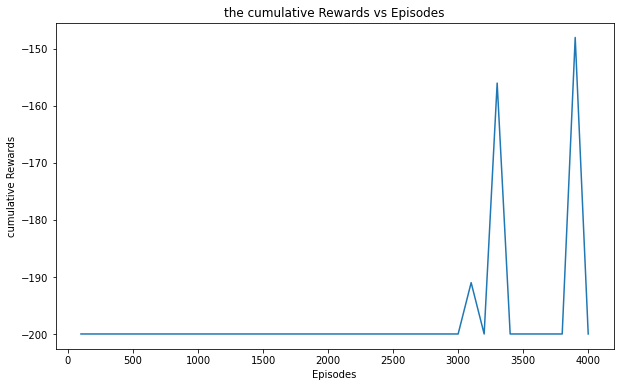

In [ ]:
# Plot cumulative Rewards

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(100*(np.arange(len(total_reward)) + 1), total_reward)
plt.xlabel('Episodes')
plt.ylabel('cumulative Rewards')
plt.title('the cumulative Rewards vs Episodes')

Text(0.5, 1.0, 'avarege Rewards vs Episodes')

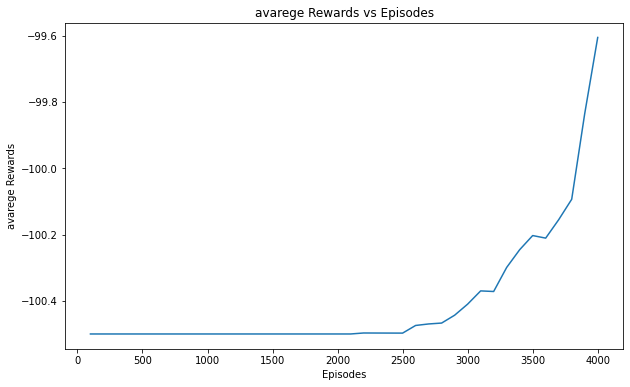

In [ ]:
# Plot avarege Rewards
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(100*(np.arange(len(ave_reward_list)) + 1), ave_reward_list)
plt.xlabel('Episodes')
plt.ylabel('avarege Rewards')
plt.title('avarege Rewards vs Episodes')

><A>**(ii) the number of time-steps required to solve the task per episode of experience**

Text(0.5, 1.0, 'the number of time-steps vs Episodes')

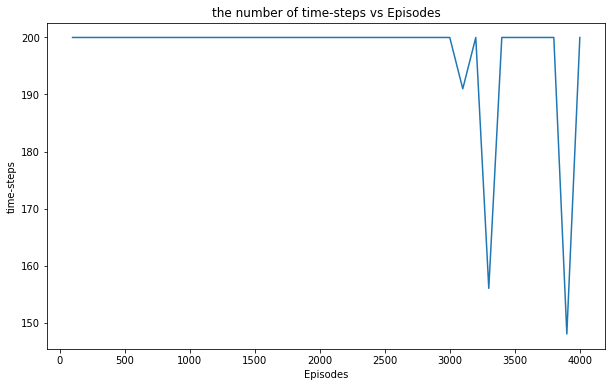

In [ ]:
# Plot time
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(100*(np.arange(len(step_list)) + 1), step_list)
plt.xlabel('Episodes')
plt.ylabel('time-steps')
plt.title('the number of time-steps vs Episodes')



---


### **TASK2**

>`For the test performance, after every 10 episodes of training. run the estimated policy in the environment for 5 test episodes and report the mean over (i) cumulative reward per episode obtained by the agent, and (ii) the number of time-steps required to solve the task per episode of experience`

**IMPLMENTATION_TASK2**

In [ ]:
class QLearning():

    def __init__(self,
                 env,
                 bins,
                 episodes=1000,
                 num_decay=None,
                 exploration_rate=0.5,
                 exploration_rate_decay=0.9,
                 alpha=0.05,
                 alpha_decay=0.9,
                 gamma=0.98,
                 reward_func=None):
        self.env = env
        self.bins = bins
        self.episodes = episodes
        self.num_decay = num_decay
        self.exploration_rate = exploration_rate
        self.exploration_rate_base = exploration_rate
        self.exploration_rate_decay = exploration_rate_decay
        self.alpha = alpha
        self.alpha_base = alpha
        self.alpha_decay = alpha_decay
        self.gamma = gamma
        self.num_action = env.action_space.n
        self.Q = {}
        self.reward_func = reward_func
 #--------------------------------------

    def set_env(self, env):
        self.env = env

    def discretization(self, value, bins):
        return np.digitize(x=[value], bins=bins)[0]

    def to_state(self, obs):

        state = []
        for i, o in enumerate(obs):
            state.append(self.discretization(o, self.bins[i]))
        state = tuple(state)

        return state

    def get_action(self, state, mode='greedy'):
        p = np.random.uniform(0, 1)
        # print p
        if p < self.exploration_rate and mode == 'greedy':
            # print('greedy')
            return random.choice([i for i in range(self.num_action)])
        x = []
        for action in range(self.num_action):
            if (state, action) not in self.Q:
                self.Q[(state, action)] = 0
            x.append(self.Q[(state, action)])
        return np.argmax(x)

    def train(self,
              train_episodes=None,
              test_interval=1,
              verbose=True):
# Initialize variables to track rewards        
        reward_list = []
        ave_reward_list = []
        step_list=[]
#------------------------------------------
        if not train_episodes:
            train_episodes = self.episodes
        timesteps = np.zeros((train_episodes//test_interval, 2))
        
        for episode in range(train_episodes):
            # agent = QLearning()
            obs = self.env.reset()
            state = self.to_state(obs)
            timestep = 0
            total_rewards=0
            # avg = 0
            while True:
                # env.render()
                timestep += 1
                action = self.get_action(state)
                obs, reward, done, _ = self.env.step(action)
                total_rewards += reward
                if self.reward_func:
                    reward = self.reward_func(obs, self.env)
  
                state_prime = self.to_state(obs)
                action_prime = self.get_action(state_prime, 'non_greedy')

                if (state_prime, action_prime) not in self.Q:
                    self.Q[(state_prime, action_prime)] = 0.1 * np.random.randn(1)
                    # Q[(state_prime, action_prime)] = 0
                if (state, action) not in self.Q:
                    self.Q[(state, action)] = 0.1 * np.random.randn(1)
                    # Q[(state, action)] = 0

                self.Q[(state, action)] += self.alpha * (reward +
                    self.gamma * self.Q[(state_prime, action_prime)] -
                    self.Q[(state, action)])
                state = state_prime

                if done:
                    # avg += timestep
                    # timesteps[episode, :] = episode, total_rewards
                    if verbose:
                        print('TRAIN Episode {} Average Reward: {}  Timestep:{}'.format(episode, total_rewards,timestep))
                    break
            if episode % test_interval == 0:
                test_timesteps = self.test(5, True)
                timesteps[episode // test_interval, :] = episode, test_timesteps[0, 1]

            
            if self.num_decay:
                decay_segment_length = train_episodes // self.num_decay
                self.alpha = self.alpha_base * (self.alpha_decay**(episode // decay_segment_length))
                self.exploration_rate = self.exploration_rate_base * (self.exploration_rate_decay **
                                                    (episode // decay_segment_length)) 
            if (episode+1) % 100 == 0:  
                  step_list.append(timestep)
        return timesteps

    def test(self, test_episodes=5, verbose=True):
        timesteps = np.zeros((test_episodes, 2), dtype=int)
        avg = 0
        step_list=[]
        for episode in range(test_episodes):
            timestep = 0
            obs = self.env.reset()
            total_rewards = 0
            while True:
                # env.render()
                timestep += 1
                state = self.to_state(obs)
                action = self.get_action(state, 'non_greedy')
                obs, reward, done, _ = self.env.step(action)
                total_rewards += reward

                if done:
                    avg += timestep
                    timesteps[episode, :] = episode, total_rewards
                    if verbose:
                        print('TEST Episode {} Average Reward: {}  Timestep:{}'.format(episode, total_rewards,timestep))
                    break
                if (episode+1) % 100 == 0:  
                  step_list.append(timestep)
        return timesteps
    
    def visualize(self, pic_name, timesteps, mode='train'):
        fig = plt.gcf()
        fig.set_size_inches(20, 6)
        fig, ax = plt.subplots()
        ax.plot(timesteps[:, 0], timesteps[:, 1])
        title = 'rewards over episodes during training'
        if mode != 'train':
            title = 'rewards over episodes during test'
        ax.set(xlabel='epidode',
               ylabel='rewards',
               title=title)
        ax.grid()
        fig.savefig(pic_name)
        plt.show()
#--------------------------------------------------
    # def visualize(self, step_list, mode='train'):
    #     plt.plot(100*(np.arange(len(step_list)) + 1), step_list)
    #     plt.xlabel('Episodes')
    #     plt.ylabel('cumulative reward')
    #     plt.title('time step vs Episodes')
    #     plt.show()    
#-------------------------------------------------------
    def save_Qtable(self, filename):
        f = open(filename, 'wb')
        pkl.dump(self.Q, f, 3)
    # def infor(self):
    #     # 最大值，平均值，方差
    #     return (np.max(self.timesteps),
    #             np.mean(self.timesteps),
    #             np.std(self.timesteps))
        
# print('average timesteps = ', avg/NUM_EPISODES)
# print('max timestep = ', np.max(timesteps))
# print('means = {}, std = {}'.format(np.mean(timesteps), np.std(timesteps)))

TRAIN Episode 0 Average Reward: -200.0  Timestep:200
TEST Episode 0 Average Reward: -200.0  Timestep:200
TEST Episode 1 Average Reward: -200.0  Timestep:200
TEST Episode 2 Average Reward: -200.0  Timestep:200
TEST Episode 3 Average Reward: -200.0  Timestep:200
TEST Episode 4 Average Reward: -200.0  Timestep:200
TRAIN Episode 1 Average Reward: -200.0  Timestep:200
TRAIN Episode 2 Average Reward: -200.0  Timestep:200
TRAIN Episode 3 Average Reward: -200.0  Timestep:200
TRAIN Episode 4 Average Reward: -200.0  Timestep:200
TRAIN Episode 5 Average Reward: -200.0  Timestep:200
TRAIN Episode 6 Average Reward: -200.0  Timestep:200
TRAIN Episode 7 Average Reward: -200.0  Timestep:200
TRAIN Episode 8 Average Reward: -200.0  Timestep:200
TRAIN Episode 9 Average Reward: -200.0  Timestep:200
TRAIN Episode 10 Average Reward: -200.0  Timestep:200
TEST Episode 0 Average Reward: -200.0  Timestep:200
TEST Episode 1 Average Reward: -200.0  Timestep:200
TEST Episode 2 Average Reward: -200.0  Timestep:200


<Figure size 1440x432 with 0 Axes>

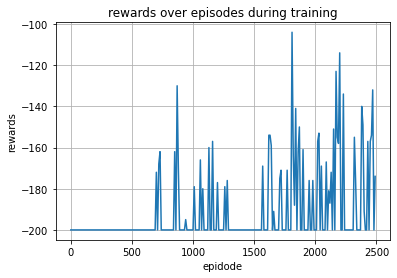

<Figure size 1440x432 with 0 Axes>

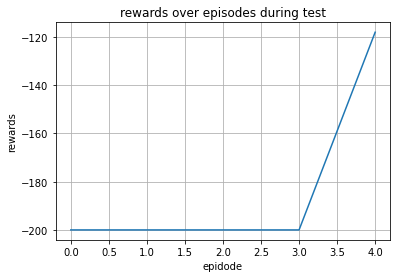

max rewards =  -118
means = -183.6, std = 32.800000000000004


In [ ]:
import gym
import numpy as np
import random
import math
from gym.envs.registration import registry, register, make
# from MyQLearning import QLearning
import pickle as pkl


NUM_EPISODES = 2500
TEST_EPISODES = 5
MAX_T = 2010
ALPHA_BASE = 0.02
ALPHA = ALPHA_BASE
ALPHA_DECAY_RATE = 0.9
GAMMA = 0.98

EXPLORATION_RATE_BASE = 0.6
EXPLORATION_RATE = EXPLORATION_RATE_BASE
EXPLORATION_RATE_DECAY = 0.95
NUM_DECAY = 5

register(
    id='MountainCar-v1',
    entry_point='gym.envs.classic_control:MountainCarEnv',
    max_episode_steps=200,
    # reward_threshold=-110.0,
)


def mountain_car():
    env = gym.make('MountainCar-v1')
    test_evn = gym.wrappers.Monitor(env, './videos/MountainCar-v1', force=True)
    NUM_ACTIONS = env.action_space.n
    CART_POS = np.linspace(-1.2, 0.6, 10)
    CART_VEL = np.linspace(-0.07, 0.07, 8)
    # CART_POS = np.linspace(-1.2, 0.6, 18)
    # CART_VEL = np.linspace(-0.07, 0.07, 10)
    bins = (CART_POS, CART_VEL)
    qlearning = QLearning(env,
                          bins,
                          num_decay=NUM_DECAY,
                          exploration_rate=EXPLORATION_RATE,
                          exploration_rate_decay=EXPLORATION_RATE_DECAY,
                          alpha=ALPHA,
                          gamma=GAMMA)
    test_interval = 10
    train_timesteps = qlearning.train(train_episodes=NUM_EPISODES, test_interval=test_interval)
    test_evn = gym.wrappers.Monitor(env, './videos/MountainCar-v1', force=True)
    qlearning.set_env(test_evn)
    test_timesteps = qlearning.test(test_episodes=5)
    qlearning.visualize('train_mountain.png', train_timesteps, mode='train')
    qlearning.visualize('test_mountain.png', test_timesteps, mode='test')
    #-----------------------------------------------------------------
    # qlearning.visualize('train_mountain.png', train_timesteps, mode='train')
    # qlearning.visualize('test_mountain.png', test_timesteps, mode='test')
    print('max rewards = ', np.max(test_timesteps[:, 1]))
    print('means = {}, std = {}'.format(np.mean(test_timesteps[:, 1]), np.std(test_timesteps[:, 1])))
    if np.mean(test_timesteps) < 100:
        qlearning.save_Qtable('/content/Mountain_Q.pkl')


def main():
    mountain_car()


if __name__ == '__main__':
    main()



---


# **TASK5**

### **initialization parameter**

In [ ]:
# initialization parameter
epsilon = 1
MAX_NUM_EPISODES = 2000
STEPS_PER_EPISODE = 200 #  This is specific to MountainCar. May change with env
EPSILON_MIN = 0.005  
max_num_steps = MAX_NUM_EPISODES * STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.001  # Learning rate
GAMMA = 0.98  # Discount factor
# hyper-parameters

alphas = [0.1, 0.5, 0.6]   
gammas = [0.1, 0.9, 0.8]  


NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each observation dim

### **Create Class to Q-Learning**

In [ ]:
# Create Class to Q-Learning
class Q_Learner(object):

    def __init__(self, env,ALPHA,GAMMA):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS  # Number of bins to Discretize each observation dim
        self.bin_width = (self.obs_high - self.obs_low) / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a multi-dimensional array (Table) to represent the Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                           self.action_shape))  # (51 x 51 x 3)
        self.alpha = ALPHA  # Learning rate
        self.gamma = GAMMA  # Discount factor
        self.epsilon = 1 

#------------------------------------------------------------------------

    def discretize(self, obs):
        return tuple(((obs - self.obs_low) / self.bin_width).astype(int))

#_______________________________________________________________________

    def get_action(self, obs):
        discretized_obs = self.discretize(obs)
        #Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # Choose a random action
            return np.random.choice([a for a in range(self.action_shape)])

#------------------------------------------------------------------------

    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)

        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] += self.alpha * td_error

### **TRAIN FUNCTION** 

In [ ]:
def train(agent, env,start,end):
    
    best_reward = -float('inf')
    timeSteps=[]
    episodes=[]
    total_rewards=[]
    ave_reward_list=[]
    for episode in range(start,end):
        init_time = time.time()
        done = False
        obs = env.reset()
        total_reward = 0.0
        steps = 0

        for t in itertools.count(): 
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward 
            steps +=1
            
            if done:
                break
        time_taken = time.time() - init_time

        if total_reward > best_reward:
            best_reward = total_reward

        if episode % 100 == 0:
            ave_reward = np.mean(total_reward)
            ave_reward_list.append(ave_reward)
            # reward_list = []
            
            
        if episode % 100 == 0:  
            timeSteps.append(steps)
        if episode % 100 == 0:  
            total_rewards.append(total_reward)

            print('Episode {} cumulative reward: {}  step:{}'.format(episode, total_reward,steps))
        
        timeSteps.append(steps)            
        episodes.append(episode)           
        total_rewards.append(total_reward) 

    return np.argmax(agent.Q, axis=2),timeSteps,episodes, total_rewards   

>`If applicable please do an in-depth hyper-parameter search. Report the justification of your choices for each hyper-parameters with supporting plots`

### **Plot cumulative Rewards For different hyper-parameter** 

Alpha: 0.1, Gamma: 0.1
______________________

Episode 100 cumulative reward: -200.0  step:200
Episode 200 cumulative reward: -200.0  step:200
Episode 300 cumulative reward: -200.0  step:200
Episode 400 cumulative reward: -200.0  step:200
Episode 500 cumulative reward: -200.0  step:200
Episode 600 cumulative reward: -200.0  step:200
Episode 700 cumulative reward: -200.0  step:200
Episode 800 cumulative reward: -200.0  step:200
Episode 900 cumulative reward: -200.0  step:200
Episode 1000 cumulative reward: -200.0  step:200
Episode 1100 cumulative reward: -200.0  step:200
Episode 1200 cumulative reward: -200.0  step:200
Episode 1300 cumulative reward: -200.0  step:200
Episode 1400 cumulative reward: -200.0  step:200
Episode 1500 cumulative reward: -200.0  step:200
Episode 1600 cumulative reward: -200.0  step:200
Episode 1700 cumulative reward: -200.0  step:200
Episode 1800 cumulative reward: -200.0  step:200
Episode 1900 cumulative reward: -200.0  step:200
Episode 2000 cumulative reward:

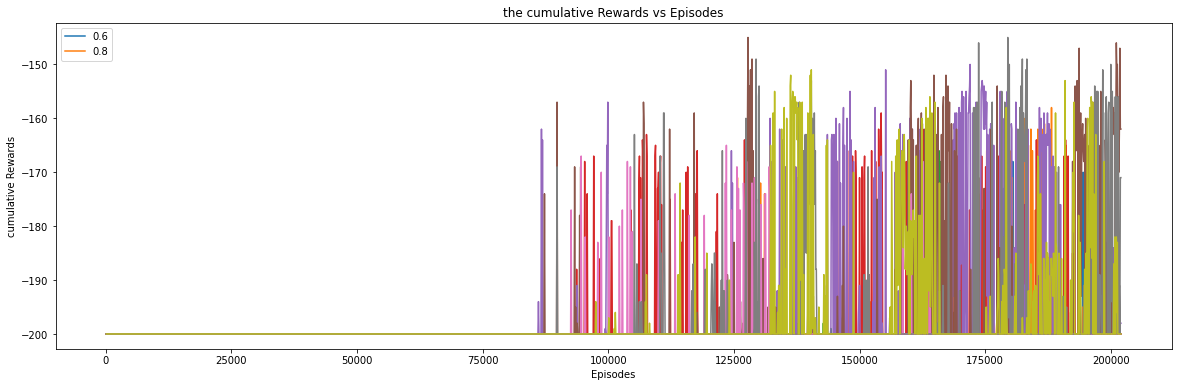

In [ ]:
if __name__ == "__main__":
      for alpha in alphas:
        for gamma in gammas:

            print(f'Alpha: {alpha}, Gamma: {gamma}')
            print('______________________\n')
            agent = Q_Learner(env,alpha,gamma)
            learned_policy,timeSteps,episodes, total_rewards,\
                                      = train(agent, env,1,MAX_NUM_EPISODES+1)
            # Plot cumulative Rewards
            fig = plt.gcf()
            fig.set_size_inches(20, 6)
            plt.plot(100*(np.arange(len(total_rewards )) + 1), total_rewards )
            plt.legend([alpha, gamma])
            plt.xlabel('Episodes')
            plt.ylabel('cumulative Rewards')
            plt.title('the cumulative Rewards vs Episodes')
            #-------------------------------
            # # Plot time
            # fig = plt.gcf()
            # fig.set_size_inches(15, 6)
            # plt.plot(100*(np.arange(len(timeSteps)) + 1), timeSteps)
            # plt.legend([alpha, gamma])
            # plt.xlabel('Episodes')
            # plt.ylabel('time-steps')
            # plt.title('the number of time-steps vs Episodes')

### **Plot timestep For different hyper-parameter**

Alpha: 0.1, Gamma: 0.1
______________________

Episode 100 cumulative reward: -200.0  step:200
Episode 200 cumulative reward: -200.0  step:200
Episode 300 cumulative reward: -200.0  step:200
Episode 400 cumulative reward: -200.0  step:200
Episode 500 cumulative reward: -200.0  step:200
Episode 600 cumulative reward: -200.0  step:200
Episode 700 cumulative reward: -200.0  step:200
Episode 800 cumulative reward: -200.0  step:200
Episode 900 cumulative reward: -200.0  step:200
Episode 1000 cumulative reward: -200.0  step:200
Episode 1100 cumulative reward: -200.0  step:200
Episode 1200 cumulative reward: -200.0  step:200
Episode 1300 cumulative reward: -200.0  step:200
Episode 1400 cumulative reward: -200.0  step:200
Episode 1500 cumulative reward: -200.0  step:200
Episode 1600 cumulative reward: -200.0  step:200
Episode 1700 cumulative reward: -200.0  step:200
Episode 1800 cumulative reward: -200.0  step:200
Episode 1900 cumulative reward: -200.0  step:200
Episode 2000 cumulative reward:

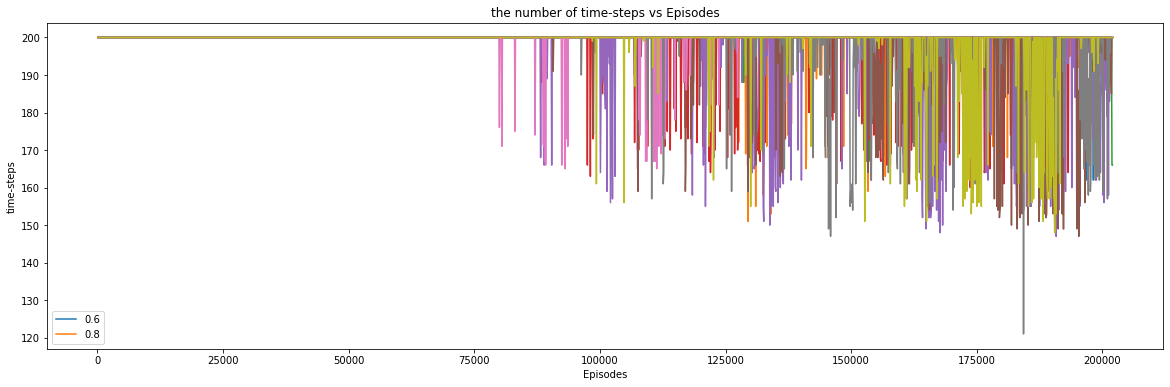

In [ ]:
if __name__ == "__main__":
      for alpha in alphas:
        for gamma in gammas:

            print(f'Alpha: {alpha}, Gamma: {gamma}')
            print('______________________\n')
            env = gym.make('MountainCar-v0')
    # agent = Q_Learning(env,alphas,gamma,epsilon)
            agent = Q_Learner(env,alpha,gamma)
            learned_policy,timeSteps,episodes, total_rewards,\
                                      = train(agent, env,1,MAX_NUM_EPISODES+1)

            #-------------------------------
            # Plot timestep
            fig = plt.gcf()
            fig.set_size_inches(20, 6)
            plt.plot(100*(np.arange(len(timeSteps)) + 1), timeSteps)
            plt.legend([alpha, gamma])
            plt.xlabel('Episodes')
            plt.ylabel('time-steps')
            plt.title('the number of time-steps vs Episodes')

### **TASK3**

>`In both training and testing plots, highlight the optimal performance (maximum return in an episode/minimum number of time-steps per episode) in a dotted line.`

In [ ]:
def plot_episode_stats_max(rewards, steps, max_reward, min_step, noshow=False):
    # Rewards per episode
    fig1 = plt.figure(figsize=(16,5))
    plt.plot(rewards)
    plt.plot(max_reward, marker='o',color='blue')
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title("Rewards per Episodes")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Time-steps per episode
    fig2 = plt.figure(figsize=(16,5))
    plt.plot(steps)
    plt.plot(min_step, marker='o',color='green')
    plt.xlabel("Episodes")
    plt.title("Time-Steps per Episodes")
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)
        
    return fig1, fig2

In [ ]:
def plot_episode_stats(rewards, steps, noshow=False):
    # Rewards per episode
    fig1 = plt.figure(figsize=(16,5))
    plt.plot(rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title("Rewards per Episodes")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Time-steps per episode
    fig2 = plt.figure(figsize=(16,5))
    plt.plot(steps)
    plt.xlabel("Episodes")
    plt.ylabel("Time-Steps")
    plt.title("Time-Steps per Episodes")
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)
        

In [ ]:
class Q_Learning(object):
    
    def __init__(self, env, alpha, gamma, epsilon):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        # Number of bins to Discretize each observation dim
        self.obs_bins = NUM_DISCRETE_BINS
        self.bin_width = (self.obs_high - self.obs_low) / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a multi-dimensional array (aka. Table) to represent the Q-values
        # (51 x 51 x 3)
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,self.action_shape))  
        # Learning rate
        self.alpha = alpha  
        # Discount factor
        self.gamma = gamma  
        self.epsilon = epsilon

    def discretize(self, obs):
        
        return tuple(((obs - self.obs_low) / self.bin_width).astype(int))

    def get_action(self, obs):
        
        discretized_obs = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  
            # Choose a random action
            return np.random.choice([a for a in range(self.action_shape)])

    def learn(self, obs, action, reward, next_obs):
        
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] += self.alpha * td_error

In [ ]:
mean_reward=[]                   
mean_steps=[]                  
max_mean_reward=[]                
min_mean_step= []              

In [ ]:
def train(agent, env):
    
    env = gym.make('MountainCar-v0')
    agent = Q_Learning(env,alphas,gamma,epsilon)
    
    rewards = []
    steps = []
    
    tot_reward=[]
    ss=[]
    
    re_avg=[]
    re_max=[]
    
    ss_avg=[]
    ss_min=[]
    
    best_reward = -float('inf')
    
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        step = 0
        
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
            step += 1
            
        if total_reward > best_reward:
            best_reward = total_reward
            
        policy= np.argmax(agent.Q, axis=2)   

        
        tot_reward.append(total_reward)
        ss.append(step)
        
        if (episode+1) % 10 == 0: 
            
            re_avg.append(np.array(tot_reward).mean())
            ss_avg.append(np.array(ss).mean())
            re_max.append(np.array(tot_reward).max())
            ss_min.append(np.array(ss).min())
            
            rew=[]
            stp=[]
            
            gym_monitor_path = "./gym_monitor_output"
            env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)

            for i in range(5):
        
                    re_test,st_test= test(agent, env, policy)
                    
                    rew.append(re_test)
                    stp.append(st_test)
 
            mean_reward.append(np.array(rew).mean())
            mean_steps.append(np.array(stp).mean())
            max_mean_reward.append(np.array(rew).max())
            min_mean_step.append(np.array(stp).min())

        print('Episode {} cumulative reward: {}  step:{}'.format(episode, total_reward,step))
            
        rewards.append(total_reward)
        steps.append(step)
        
    plot_episode_stats(rewards, steps)
    plot_episode_stats_max(re_avg, ss_avg, re_max, ss_min)
    plot_episode_stats_max(mean_reward, mean_steps, max_mean_reward, min_mean_step)

def test(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    stepp=0
    
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
        stepp+=1
    return total_reward,stepp

Episode 0 cumulative reward: -200.0  step:200
Episode 1 cumulative reward: -200.0  step:200
Episode 2 cumulative reward: -200.0  step:200
Episode 3 cumulative reward: -200.0  step:200
Episode 4 cumulative reward: -200.0  step:200
Episode 5 cumulative reward: -200.0  step:200
Episode 6 cumulative reward: -200.0  step:200
Episode 7 cumulative reward: -200.0  step:200
Episode 8 cumulative reward: -200.0  step:200
Episode 9 cumulative reward: -200.0  step:200
Episode 10 cumulative reward: -200.0  step:200
Episode 11 cumulative reward: -200.0  step:200
Episode 12 cumulative reward: -200.0  step:200
Episode 13 cumulative reward: -200.0  step:200
Episode 14 cumulative reward: -200.0  step:200
Episode 15 cumulative reward: -200.0  step:200
Episode 16 cumulative reward: -200.0  step:200
Episode 17 cumulative reward: -200.0  step:200
Episode 18 cumulative reward: -200.0  step:200
Episode 19 cumulative reward: -200.0  step:200
Episode 20 cumulative reward: -200.0  step:200
Episode 21 cumulative r

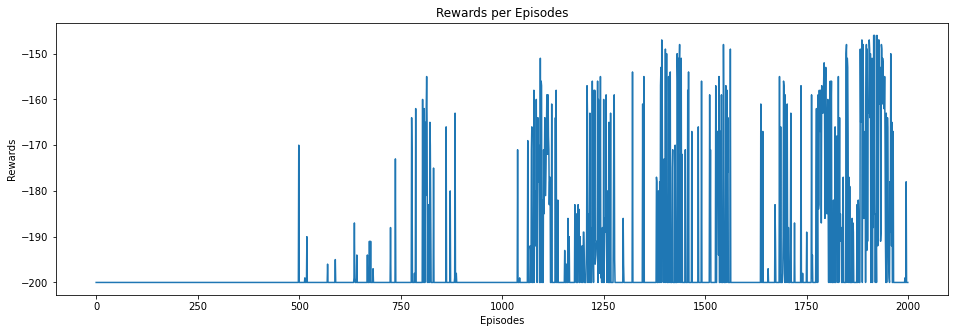

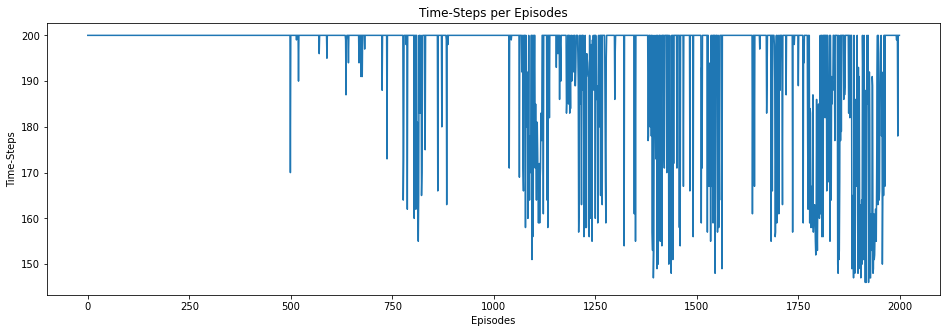

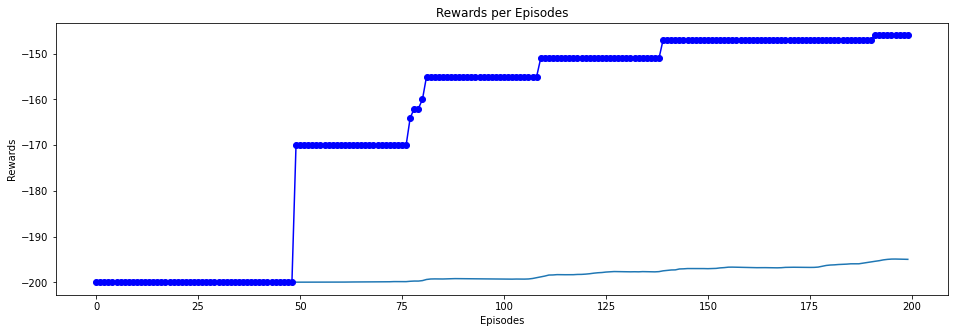

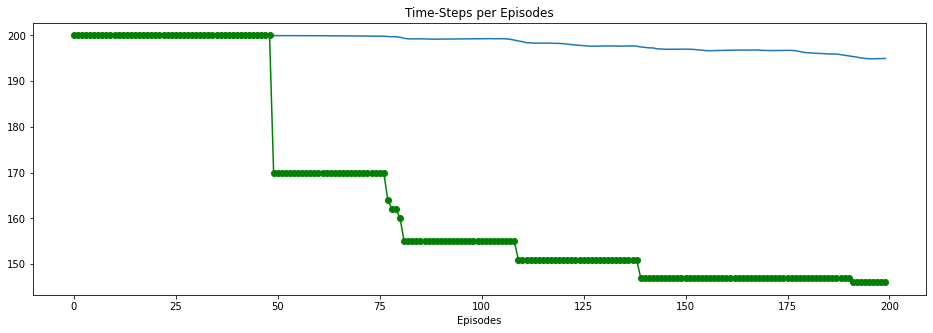

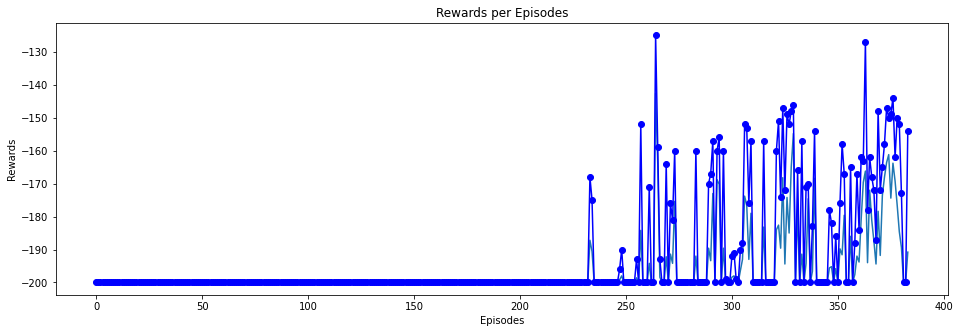

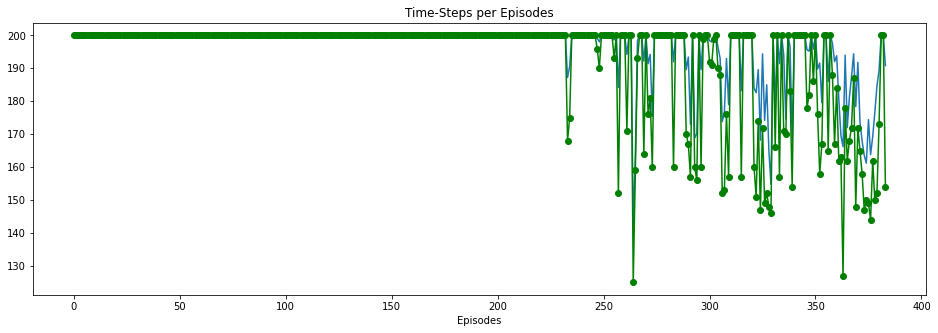

In [ ]:
alphas =0.4
gamma = 0.8
epsilon =0.1
agent=Q_Learning(env,alphas,gamma,epsilon)
learned_policy=train(agent, env)

>we change the plot when we update hyperparameter

# **NOTES**

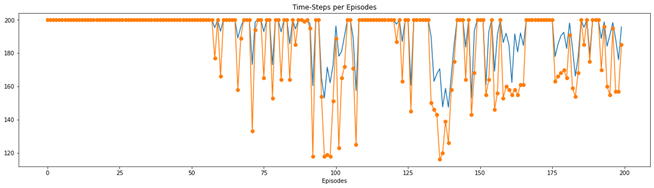

>this plot is the first output then i change color and hyperparameter 